<h2> TUGAS 2 AI </h2>

NAMA  : Bastomy <br>
NIM   : 1301178418 <br>
Kelas : IF-40-GAB05

In [1]:
import pandas as pd
from random import randint
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("DataTugas2.csv")

In [3]:
x = data[" Pendapatan"]
y = data[" Hutang"]

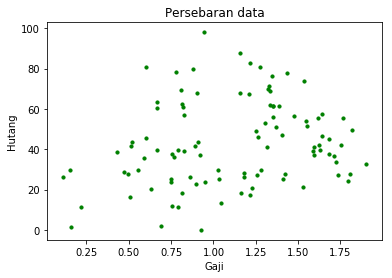

In [4]:
plt.title('Persebaran data')
plt.xlabel('Gaji')
plt.ylabel('Hutang')
plt.scatter(x, y, c='green', s=10)

### Tahap 1 (Menentukan Value)

pendapatan= low, medium, high <br>
hutang    = kecil, besar <br>
diterima  = ya, tidak, mungkin <br>

In [5]:
fPendapatan = []
fHutang = []

### Tahap 2 (Menentukan Membership)

<strong>Grafik Klasifikasi Pendapatan</strong>

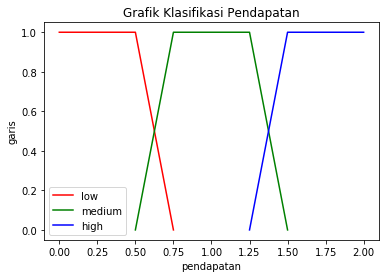

In [6]:
low_x = [0, 0.5, 0.75]
low_y = [1, 1, 0]

medium_x= [0.5, 0.75, 1.25,1.5]
medium_y= [0, 1, 1 ,0]

high_x = [1.25, 1.5, 2] 
high_y = [0, 1, 1]

plt.plot(low_x, low_y, color="r" , label="low")
plt.plot(medium_x, medium_y, color="g", label="medium")
plt.plot(high_x, high_y, color="b", label="high")
plt.xlabel('pendapatan')
plt.ylabel('garis')
plt.title('Grafik Klasifikasi Pendapatan')
plt.legend()

### Rule Gaji
<table>
    <tr>
        <td>Low</td>
        <td>:</td>        
        <td><b>0 - 0.5</b></td>
    </tr>
    <tr>
        <td>Low-Medium</td>
        <td>:</td>        
        <td><b>>0.5 - < 0.75</b></td>
    </tr>
    <tr>
        <td>Medium</td>
        <td>:</td>        
        <td><b>0.75 - 1.25</b></td>
    </tr>
    <tr>
        <td>Medium-High</td>
        <td>:</td>        
        <td><b> >1.25 - < 1.5</b></td>
    </tr>
    <tr>
        <td>High</td>
        <td>:</td>        
        <td><b>1.5</b> - <b>2.0</b></td>
    </tr>
</table>

<strong>Grafik Klasifikasi Hutang</strong>

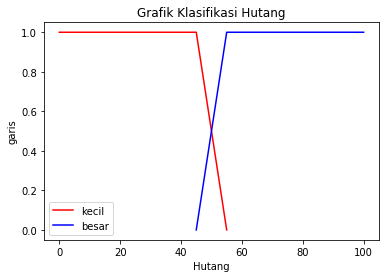

In [7]:
low_x = [0, 45, 55]
low_y = [1, 1, 0]

medium_x= [45, 55, 100]
medium_y= [0, 1 ,1]

plt.plot(low_x, low_y, color="r" , label="kecil")
plt.plot(medium_x, medium_y, color="b", label="besar")
plt.xlabel('Hutang')
plt.ylabel('garis')
plt.title('Grafik Klasifikasi Hutang')
plt.legend()

### Rule Hutang
<table>
    <tr>
        <td>Kecil</td>
        <td>:</td>        
        <td><b>0 - 45</b></td>
    </tr>
    <tr>
        <td>Kecil-Besar</td>
        <td>:</td>        
        <td><b>>45 - < 55</b></td>
    </tr>
    <tr>
        <td>Besar</td>
        <td>:</td>        
        <td><b>55 - 100</b></td>
    </tr>
</table>

### Tahap 3 (Fuzzification)

In [8]:
def fuzzyficationPendapatanLow(x):
    if (x <= 0.5):
        return 1
    elif((x>0.5) and (x<0.75)):
        return abs((x-0.75)/(0.75-0.5))
    else:
        return 0

In [9]:
def fuzzyficationPendapatanMedium(x):
    if((x>=0.5) and (x<0.75)):
        return abs((x-0.5)/(0.75-0.5))
    elif((x>=0.75) and (x<=1.25)):
        return 1    
    elif((x>1.25) and (x<1.5)):
        return abs((x-1.5)/(1.5-1.25))
    else:
        return 0

In [10]:
def fuzzyficationPendapatanHigh(x):
    if(x>=1.5):
        return 1
    elif((x>1.25) and (x<1.5)):
        return abs((x-1.25)/(1.5-1.25))
    else:
        return 0

In [11]:
def fuzzyficationHutangKecil(y):
    if(y<=45):
        return 1
    elif((y>45) and (y<55)):
        return abs((y-55)/(55-45))
    else:
        return 0

In [12]:
def fuzzyficationHutangBesar(y):
    if(y>=55):
        return 1
    elif((y>45) and (y<55)):
        return abs((y-45)/(55-45))
    else:
        return 0

In [13]:
def fuzzyficationPendapatan(x):
    fPendapatan.append([fuzzyficationPendapatanLow(x),fuzzyficationPendapatanMedium(x),fuzzyficationPendapatanHigh(x)])

In [14]:
def fuzzyficationHutang(y):
    fHutang.append([fuzzyficationHutangKecil(y),fuzzyficationHutangBesar(y)])

In [15]:
for i in range(len(x)) :
    fuzzyficationPendapatan(x[i])

In [16]:
for i in range(len(y)) :
    fuzzyficationHutang(y[i])

### Tahap 4 (Rule)

<table>
    <tr>
        <td>Hutang/Pendapatan</td>
        <td>Low</td>
        <td>Medium</td>
        <td>High</td>
    </tr>
    <tr>
        <td>Kecil</td>
        <td>M</td>
        <td>M</td>
        <td>N</td>
    </tr>
    <tr>
        <td>Besar</td>
        <td>Y</td>
        <td>Y</td>
        <td>N</td>
    </tr>    
</table>

### Tahap 5 (Inferensi)

In [17]:
inferensi = []
hasilInferensi = []

In [18]:
for i in range(len(x)):
    role1 = min(fPendapatan[i][0],fHutang[i][0])
    role2 = min(fPendapatan[i][1],fHutang[i][0])
    role3 = min(fPendapatan[i][2],fHutang[i][0])
    role4 = min(fPendapatan[i][0],fHutang[i][1])
    role5 = min(fPendapatan[i][1],fHutang[i][1])
    role6 = min(fPendapatan[i][2],fHutang[i][1])
    hasilInferensi.append([max(role1,role2),max(role3,role6),max(role4,role5)])


### Tahap 6 (De-Fuzzyfication)

### Grafik Diterima

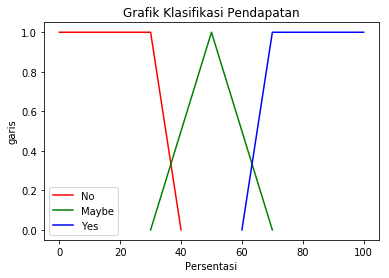

In [19]:
low_x = [0, 30, 40]
low_y = [1, 1, 0]

medium_x= [30, 50 , 70]
medium_y= [0, 1 ,0]

high_x = [60, 70, 100] 
high_y = [0, 1, 1]

plt.plot(low_x, low_y, color="r" , label="No")
plt.plot(medium_x, medium_y, color="g", label="Maybe")
plt.plot(high_x, high_y, color="b", label="Yes")
plt.xlabel('Persentasi')
plt.ylabel('garis')
plt.title('Grafik Klasifikasi Pendapatan')
plt.legend()

In [20]:
defuzzyfication = []

In [21]:
for i in range(len(hasilInferensi)):
    hasil = 0
    pembagi = 0
    for j in range(5):
        random = randint(0,100)
        if(random<=30):
            hasil = hasil + 0
            pembagi = pembagi + 0
        elif((random>30) and (random <40)):
            hasil = hasil + (random * hasilInferensi[i][0])
            pembagi = pembagi + hasilInferensi[i][0]
        elif((random>=40) and (random<60)):
            hasil = hasil + (random * hasilInferensi[i][0])
            pembagi = pembagi + hasilInferensi[i][0]
        elif((random>=60) and (random<70)): 
            hasil = hasil + (random * hasilInferensi[i][0]) + (random* hasilInferensi[i][2])
            pembagi = pembagi + hasilInferensi[i][0] + hasilInferensi[i][2]
        elif(random>=70):
            hasil = hasil + (random * hasilInferensi[i][2])
            pembagi = pembagi + hasilInferensi[i][2]
    if(pembagi==0):
        defuzzyfication.append([i,0])
    else:
        defuzzyfication.append([hasil/pembagi])        

In [22]:
hasilAkhir = [x for _,x in sorted(zip(defuzzyfication,data["No"]),reverse=True)]

In [23]:
hasilAkhir[:20]

[96, 9, 3, 77, 62, 90, 44, 87, 94, 32, 86, 66, 67, 84, 68, 18, 82, 43, 92, 48]

In [26]:
result = pd.DataFrame({
    "No" : hasilAkhir[:20], 
})

In [28]:
result.to_csv('prediction.csv', index = False)
result_role = pd.read_csv("prediction.csv")

List 